In [36]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt')

In [41]:
df.head(5)

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [42]:
df.columns

Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')

In [24]:
df.dtypes

Unnamed: 0       int64
Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [25]:
df.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [29]:
# printing the keys

print("keys :\n" , df.keys())

keys :
 Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')


In [50]:
# Creating input features and target variables

X = df.drop('Price' , axis = 1)
y = df['Price']



In [51]:
print('Shape of X : ', X.shape)
print('Shape of y : ', y.shape)

Shape of X :  (645, 7)
Shape of y :  (645,)


In [52]:
# training and testing the dataset

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2 , random_state = 51)

print('Shape of X train :' , X_train.shape)
print('Shape of X test :' , X_test.shape)
print('Shape of y train :' , y_train.shape)
print('Shape of y test :' , y_test.shape)

Shape of X train : (516, 7)
Shape of X test : (129, 7)
Shape of y train : (516,)
Shape of y test : (129,)


In [53]:
# Searching that for optimal value of k
# Empty list for appending rmse(root mean square error)

rmse_val = []

for k in range(1,20):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train,y_train)
    
    pred = model.predict(X_test)
    
    error = np.sqrt(mean_squared_error(y_test , pred))
    
    rmse_val.append(error)
    
    print('RMSE value for k :', k , 'is :', error)

RMSE value for k : 1 is : 23921.171790475848
RMSE value for k : 2 is : 23255.90097166472
RMSE value for k : 3 is : 21119.019010390617
RMSE value for k : 4 is : 19946.088984196973
RMSE value for k : 5 is : 19533.42245976439
RMSE value for k : 6 is : 19694.648707009386
RMSE value for k : 7 is : 19416.14688484357
RMSE value for k : 8 is : 19547.20013667586
RMSE value for k : 9 is : 20203.169485769893
RMSE value for k : 10 is : 19941.617351970304
RMSE value for k : 11 is : 20177.881621026358
RMSE value for k : 12 is : 19988.53261463956
RMSE value for k : 13 is : 19860.512878918267
RMSE value for k : 14 is : 19624.98401915115
RMSE value for k : 15 is : 19456.63667837926
RMSE value for k : 16 is : 19460.31644871264
RMSE value for k : 17 is : 19515.454374059067
RMSE value for k : 18 is : 19691.450052701333
RMSE value for k : 19 is : 19563.571671700964


In [54]:
from sklearn.metrics import r2_score

In [55]:
r2_val = []

for k in range(1,20):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train , y_train)
    
    pred = model.predict(X_test)
    
    r2 = r2_score(y_test , pred)
    
    r2_val.append(r2)
    
    print('R2 value for k : ', k , 'is :' , r2)
    

R2 value for k :  1 is : 0.5410325082112186
R2 value for k :  2 is : 0.566206175646087
R2 value for k :  3 is : 0.6422624665316701
R2 value for k :  4 is : 0.6808957925841543
R2 value for k :  5 is : 0.6939631580031844
R2 value for k :  6 is : 0.6888903348090232
R2 value for k :  7 is : 0.6976269200281735
R2 value for k :  8 is : 0.6935312865518163
R2 value for k :  9 is : 0.6726170630742357
R2 value for k :  10 is : 0.6810388538841784
R2 value for k :  11 is : 0.6734361062672531
R2 value for k :  12 is : 0.6795362928589597
R2 value for k :  13 is : 0.6836280690930648
R2 value for k :  14 is : 0.6910873809314884
R2 value for k :  15 is : 0.6963644873477182
R2 value for k :  16 is : 0.6962496252955974
R2 value for k :  17 is : 0.6945259233966918
R2 value for k :  18 is : 0.6889913827103851
R2 value for k :  19 is : 0.6930177128063206


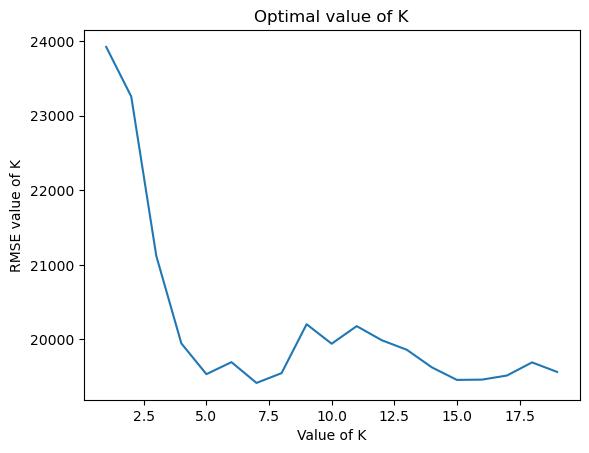

In [56]:
# Visualization 

k_range = range(1,20)
plt.plot(k_range , rmse_val)
plt.xlabel('Value of K')
plt.ylabel('RMSE value of K')
plt.title('Optimal value of K')
plt.show()

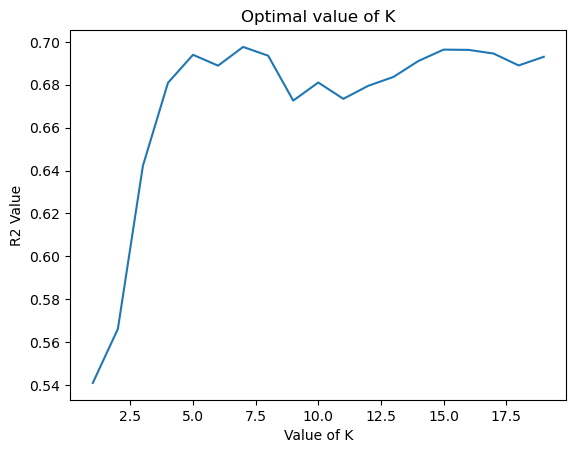

In [57]:
k_range = range(1,20)
plt.plot(k_range , r2_val)
plt.xlabel('Value of K')
plt.ylabel('R2 Value')
plt.title('Optimal value of K')
plt.show()

In [70]:
# Optimal model

model = KNeighborsRegressor(n_neighbors = 7)

In [71]:
# Fitting the model

model.fit(X_train , y_train)


KNeighborsRegressor(n_neighbors=7)

In [72]:
# Predicting from the model

pred = model.predict(X_test)


In [73]:
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)

In [74]:
print('RMSE is :',rmse)
print('R2 score is :',r2)

RMSE is : 19416.14688484357
R2 score is : 0.6976269200281735


In [75]:
model.score(X_test , y_test)

0.6976269200281735

In [76]:
#Predict the value of home :

X_test.iloc[-1 , :]

Unnamed: 0     263.000
Sqft           914.406
Floor           12.000
TotalFloor      12.000
Bedroom          3.000
Living.Room      2.000
Bathroom         2.000
Name: 260, dtype: float64

In [78]:
x = model.predict([X_test.iloc[-1 , :]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [79]:
x

array([37971.28571429])

In [81]:
z = y_test.iloc[-1]

In [82]:
z

36000

In [47]:
!pip install pandas-profiling

     ------------------------------------ 324.4/324.4 kB 291.4 kB/s eta 0:00:00
     ------------------------------------ 344.5/344.5 kB 464.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.1/2.1 MB 720.8 kB/s eta 0:00:00
     ------------------------------------ 663.5/663.5 kB 949.5 kB/s eta 0:00:00
     ------------------------------------ 102.7/102.7 kB 739.5 kB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 1.4 MB/s eta 0:00:00
     -------------------------------------- 296.5/296.5 kB 2.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=2f0f5e69df217bdc6034791f955c7351172010433fdc4bf693c3546474276d97
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


In [48]:
from pandas_profiling import ProfileReport

C:\Users\HP\AppData\Local\Temp\ipykernel_8264\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [49]:
profile = ProfileReport(df)
profile.to_file(output_file = 'housing.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]